In [1]:
import pandas as pd
import seaborn as sns
import scanpy as sc
import matplotlib.pyplot as plt

In [18]:
split = 2
path = f"/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/adata_ood_{split}.h5ad"
adata_ood = sc.read(path)
ood_conditions = adata_ood.obs["condition"].cat.categories

In [19]:
df = pd.read_csv("gse_score_2.csv")
df = df.drop(columns=["Unnamed: 0"])
df = df.T
df["score"] = df[0]
df["condition"] = df.index

In [20]:
def get_mode(x):
    if "pred" in x["condition"]:
        return "ood_pred"
    if x["condition"] in ood_conditions:
        return "ood_true"
    return "seen"

In [21]:
df["mode"] = df.apply(get_mode, axis=1)

In [22]:
df.head()

,0,score,condition,mode
Alvespimycin+Pirarubicin,-0.859834,-0.859834,Alvespimycin+Pirarubicin,seen
Cediranib+PCI-34051,0.660678,0.660678,Cediranib+PCI-34051,seen
Dacinostat+Danusertib,-0.866368,-0.866368,Dacinostat+Danusertib,seen
Dacinostat+Dasatinib,-0.862712,-0.862712,Dacinostat+Dasatinib,ood_true
Dacinostat+Dasatinib_pred,-0.892673,-0.892673,Dacinostat+Dasatinib_pred,ood_pred


In [23]:
df_true = df[df["mode"]=="ood_true"]
df_pred = df[df["mode"]=="ood_pred"]

In [24]:
df_true["rank_true"] = df_true["score"].rank()
df_pred["rank_pred"] = df_pred["score"].rank()

/tmp/ipykernel_891291/1674682805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true["rank_true"] = df_true["score"].rank()
/tmp/ipykernel_891291/1674682805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred["rank_pred"] = df_pred["score"].rank()


In [25]:
df_pred["condition"] = df_pred.index
df_pred["condition"] = df_pred.apply(lambda x: x["condition"].split('_', 1)[0], axis=1)

/tmp/ipykernel_891291/2401045840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred["condition"] = df_pred.index
/tmp/ipykernel_891291/2401045840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred["condition"] = df_pred.apply(lambda x: x["condition"].split('_', 1)[0], axis=1)


In [26]:
df_pred = df_pred.set_index("condition")

In [27]:
df_res = pd.concat((df_true, df_pred), axis=1)

In [28]:
df_res

,0,score,condition,mode,rank_true,0,score,mode,rank_pred
Dacinostat+Dasatinib,-0.862712,-0.862712,Dacinostat+Dasatinib,ood_true,1.0,-0.892673,-0.892673,ood_pred,3.0
Dacinostat+PCI-34051,-0.851036,-0.851036,Dacinostat+PCI-34051,ood_true,2.0,-0.892926,-0.892926,ood_pred,2.0
Givinostat+Cediranib,-0.850261,-0.850261,Givinostat+Cediranib,ood_true,3.0,-0.573945,-0.573945,ood_pred,7.0
Givinostat+Curcumin,-0.819352,-0.819352,Givinostat+Curcumin,ood_true,4.0,-0.900047,-0.900047,ood_pred,1.0
Panobinostat+Alvespimycin,-0.776528,-0.776528,Panobinostat+Alvespimycin,ood_true,7.0,-0.787655,-0.787655,ood_pred,4.0
Panobinostat+SRT3025,-0.801940,-0.801940,Panobinostat+SRT3025,ood_true,6.0,-0.779139,-0.779139,ood_pred,5.0
control+Panobinostat,-0.809397,-0.809397,control+Panobinostat,ood_true,5.0,-0.773956,-0.773956,ood_pred,6.0


/tmp/ipykernel_891291/3574232351.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_res['rank_true'][i] + 0.05, df_res['rank_pred'][i], df_res['condition'][i], fontsize=9)


Text(0, 0.5, 'Predicted rank among OOD\n drugs of pathway activation')

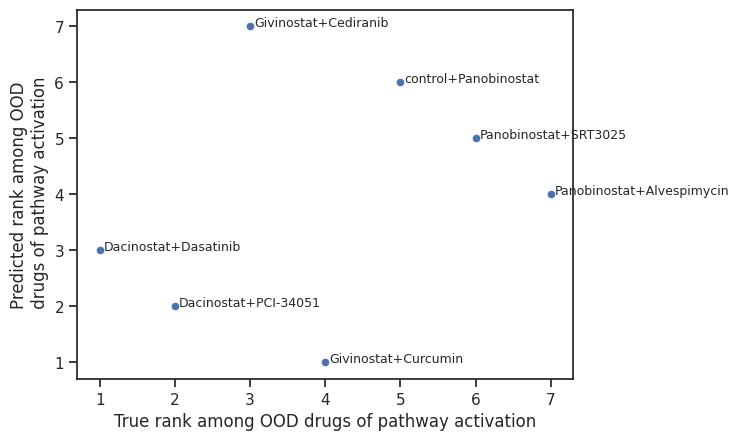

In [29]:
sns.scatterplot(df_res, x="rank_true", y="rank_pred")
for i in range(df_res.shape[0]):
    plt.text(df_res['rank_true'][i] + 0.05, df_res['rank_pred'][i], df_res['condition'][i], fontsize=9)
plt.xlabel("True rank among OOD drugs of pathway activation")
plt.ylabel("Predicted rank among OOD\n drugs of pathway activation")

/tmp/ipykernel_891291/2991197323.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df_res['rank_true'][i] > 5:  # Adjusting for true rank > 5
/tmp/ipykernel_891291/2991197323.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(df_res['rank_true'][i] + 0.1, df_res['rank_pred'][i], df_res['condition'][i], fontsize=10, color='black')
/tmp/ipykernel_891291/2991197323.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax

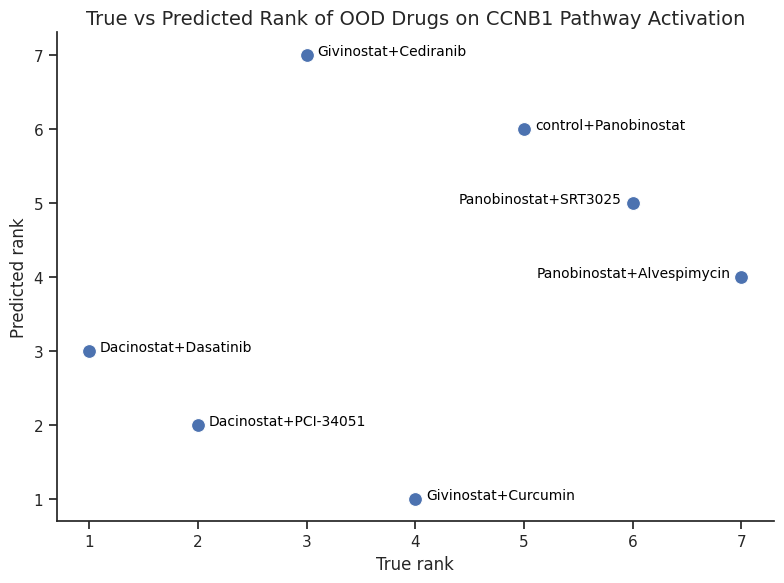

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.set(style="ticks")

# Create scatterplot with labels
ax = sns.scatterplot(data=df_res, x="rank_true", y="rank_pred", s=100)

# Add labels to each point
for i in range(df_res.shape[0]):
    if df_res['rank_true'][i] > 5:  # Adjusting for true rank > 5
        ax.text(df_res['rank_true'][i] - 0.1, df_res['rank_pred'][i], df_res['condition'][i], fontsize=10, color='black', ha='right')
    else:
        ax.text(df_res['rank_true'][i] + 0.1, df_res['rank_pred'][i], df_res['condition'][i], fontsize=10, color='black')


# Set axis labels and title
plt.xlabel("True rank", fontsize=12)
plt.ylabel("Predicted rank", fontsize=12)
plt.title("True vs Predicted Rank of OOD Drugs on CCNB1 Pathway Activation", fontsize=14)

sns.despine()
# Display the plot
plt.tight_layout()
plt.show()

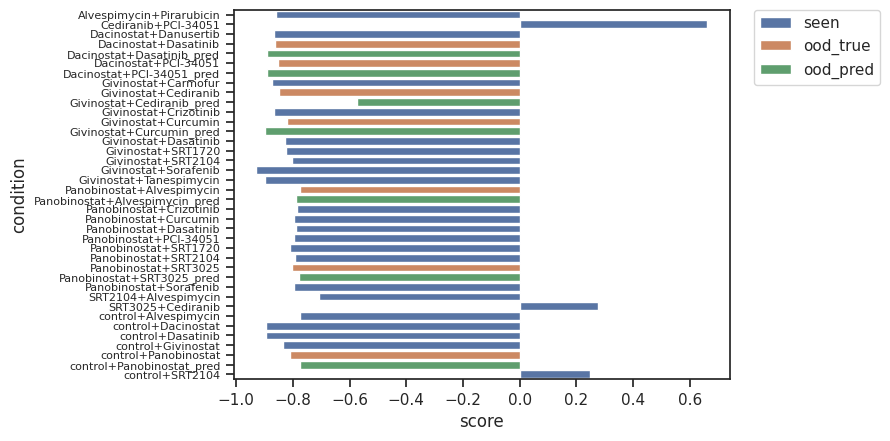

In [31]:
import matplotlib.pyplot as plt
sns.barplot(df, y="condition", x="score", hue="mode")
plt.xticks(rotation=0)
plt.yticks(fontsize=8) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


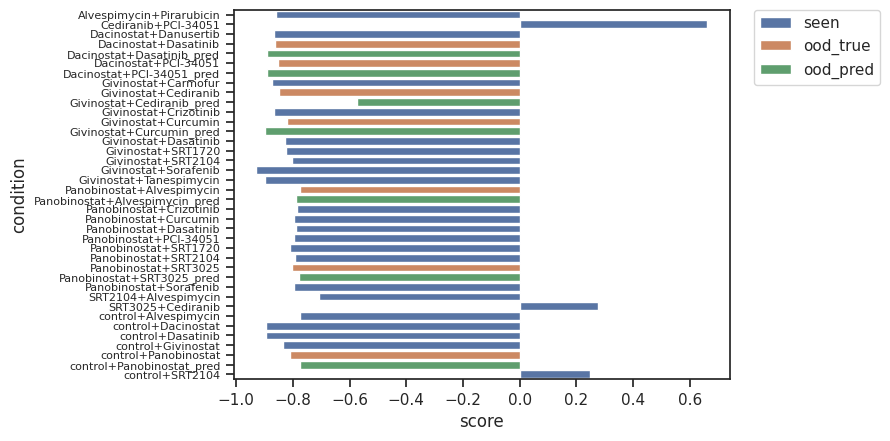

In [32]:
import matplotlib.pyplot as plt
sns.barplot(df, y="condition", x="score", hue="mode")
plt.xticks(rotation=0)
plt.yticks(fontsize=8) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


In [33]:
df_res["rank_true"].corr(df_res["rank_pred"], method="spearman")

0.28571428571428575